**ML Implementation**

In this phase, machine learning methods are applied to the datasets. The COIL dataset was selected for modeling because it represents real environmental conditions, making it more suitable for predictive analysis and scientifically meaningful interpretation compared to a controlled laboratory dataset.

Two main tasks will be completed in the notebook:
1.   Generating an ML model to predict "mean_chlorophyll"
2.   Generating an ML model to predict mean of frequencies of algae groups

The results of these two models are compared to evaluate how machine learning performance differs when predicting two types of biological outcomes: a biochemical indicator (chlorophyll concentration) versus a community level biological measure (mean algal abundance). It is expected that models will perform better when predicting chlorophyll, since the input features consist of physicochemical parameters that are more directly associated with biomass-related indicators than with aggregated biological population measures.

In [1]:
import pandas as pd
import numpy as np
df_coil_processed = pd.read_csv('/content/df_coil_processed.csv')
df_coil_processed

,Season,Size,River_Size,Max_pH,Min_O2,Mean_Cl,Mean_NO3,Mean_NH4,Mean_Orthophosphate,Mean_Phosphate,Mean_Chlorophyll,Algae_Group_1,Algae_Group_2,Algae_Group_3,Algae_Group_4,Algae_Group_5,Algae_Group_6,Algae_Group_7
0,winter,small_,medium,8.00,9.8,4.123903,1.979345,6.361302,4.663439,5.141664,3.931826,0.000000,0.000000,0.000000,0.000000,3.561046,2.230014,0.000000
1,spring,small_,medium,8.35,8.0,4.073291,0.827678,5.916202,6.063204,6.327490,0.832909,0.875469,2.151762,1.757858,1.064711,2.041220,0.000000,1.131402
2,autumn,small_,medium,8.10,11.4,3.714060,1.845300,5.851245,4.841562,5.236745,2.809403,1.458615,4.000034,1.064711,0.000000,0.000000,0.000000,2.370244
3,spring,small_,medium,8.07,4.8,4.361365,1.194528,4.596957,4.130066,4.939497,0.875469,1.410987,3.737670,2.990720,0.000000,0.875469,0.000000,0.875469
4,autumn,small_,medium,8.06,9.0,4.031582,2.435016,5.458308,4.081293,4.590868,2.442347,2.322388,1.360977,2.140066,0.000000,2.140066,1.629241,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,autumn,large_,medium,8.40,8.4,2.910991,1.575467,4.439706,4.000492,4.391358,1.205372,2.617396,3.122365,1.887070,0.000000,0.693147,0.000000,0.000000
196,spring,large_,medium,8.30,10.6,2.729159,1.435085,4.838921,3.592726,4.342558,1.734660,2.944439,2.079442,0.993252,0.000000,1.757858,2.424803,0.693147
197,autumn,large_,medium,8.20,7.0,4.948682,1.380779,4.112676,4.373654,4.950319,3.488536,0.000000,2.827314,1.223775,0.693147,0.000000,0.000000,0.000000
198,winter,large_,medium,8.00,7.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.602690,1.547563,0.693147,0.000000,0.000000,1.774952


**Feature Engineering**

We have some important categorical variables, let's convert them to numericals.

In [2]:
df_coil_encoded = pd.get_dummies(df_coil_processed, columns=['Season', 'Size', 'River_Size'], drop_first=False, dtype=int)
df_coil_encoded

,Max_pH,Min_O2,Mean_Cl,Mean_NO3,Mean_NH4,Mean_Orthophosphate,Mean_Phosphate,Mean_Chlorophyll,Algae_Group_1,Algae_Group_2,...,Season_autumn,Season_spring,Season_summer,Season_winter,Size_large_,Size_medium,Size_small_,River_Size_high__,River_Size_low___,River_Size_medium
0,8.00,9.8,4.123903,1.979345,6.361302,4.663439,5.141664,3.931826,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,1
1,8.35,8.0,4.073291,0.827678,5.916202,6.063204,6.327490,0.832909,0.875469,2.151762,...,0,1,0,0,0,0,1,0,0,1
2,8.10,11.4,3.714060,1.845300,5.851245,4.841562,5.236745,2.809403,1.458615,4.000034,...,1,0,0,0,0,0,1,0,0,1
3,8.07,4.8,4.361365,1.194528,4.596957,4.130066,4.939497,0.875469,1.410987,3.737670,...,0,1,0,0,0,0,1,0,0,1
4,8.06,9.0,4.031582,2.435016,5.458308,4.081293,4.590868,2.442347,2.322388,1.360977,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8.40,8.4,2.910991,1.575467,4.439706,4.000492,4.391358,1.205372,2.617396,3.122365,...,1,0,0,0,1,0,0,0,0,1
196,8.30,10.6,2.729159,1.435085,4.838921,3.592726,4.342558,1.734660,2.944439,2.079442,...,0,1,0,0,1,0,0,0,0,1
197,8.20,7.0,4.948682,1.380779,4.112676,4.373654,4.950319,3.488536,0.000000,2.827314,...,1,0,0,0,1,0,0,0,0,1
198,8.00,7.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.602690,...,0,0,0,1,1,0,0,0,0,1


Let's also add the mean frequency feature in the dataframe.

In [3]:
algae_group_columns = [col for col in df_coil_encoded.columns if col.startswith('Algae_Group_')]
df_coil_encoded['mean_freq'] = df_coil_encoded[algae_group_columns].mean(axis=1)
df_coil_encoded = df_coil_encoded.drop(columns=algae_group_columns)
df_coil_encoded

,Max_pH,Min_O2,Mean_Cl,Mean_NO3,Mean_NH4,Mean_Orthophosphate,Mean_Phosphate,Mean_Chlorophyll,Season_autumn,Season_spring,Season_summer,Season_winter,Size_large_,Size_medium,Size_small_,River_Size_high__,River_Size_low___,River_Size_medium,mean_freq
0,8.00,9.8,4.123903,1.979345,6.361302,4.663439,5.141664,3.931826,0,0,0,1,0,0,1,0,0,1,0.827294
1,8.35,8.0,4.073291,0.827678,5.916202,6.063204,6.327490,0.832909,0,1,0,0,0,0,1,0,0,1,1.288917
2,8.10,11.4,3.714060,1.845300,5.851245,4.841562,5.236745,2.809403,1,0,0,0,0,0,1,0,0,1,1.270515
3,8.07,4.8,4.361365,1.194528,4.596957,4.130066,4.939497,0.875469,0,1,0,0,0,0,1,0,0,1,1.412902
4,8.06,9.0,4.031582,2.435016,5.458308,4.081293,4.590868,2.442347,1,0,0,0,0,0,1,0,0,1,1.469412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8.40,8.4,2.910991,1.575467,4.439706,4.000492,4.391358,1.205372,1,0,0,0,1,0,0,0,0,1,1.188568
196,8.30,10.6,2.729159,1.435085,4.838921,3.592726,4.342558,1.734660,0,1,0,0,1,0,0,0,0,1,1.556134
197,8.20,7.0,4.948682,1.380779,4.112676,4.373654,4.950319,3.488536,1,0,0,0,1,0,0,0,0,1,0.677748
198,8.00,7.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1,1,0,0,0,0,1,0.945479


Let's prepare the data for ML, final step before execution.

In [4]:
X = df_coil_encoded.drop(columns=['Mean_Chlorophyll', 'mean_freq'])
y1 = df_coil_encoded['Mean_Chlorophyll']
y2 = df_coil_encoded['mean_freq']

**ML Models**

I will try both targets with 3 ML models: linear regression, nearest neighbor and random forest.

I will use K Folds since the data is fairly smaller. All models will perform on the same folds which will enable reliable comparative analysis.

In [5]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

models = []

models.append((
    'Linear Regression',
    Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])
))

models.append((
    'K-Neighbors Regressor',
    Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', KNeighborsRegressor())
    ])
))

models.append((
    'Random Forest Regressor',
    RandomForestRegressor(random_state=42)
))

In [12]:
from sklearn.model_selection import cross_validate, cross_val_predict

all_results = []

scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

targets = [
    ('Mean_Chlorophyll', y1),
    ('mean_freq', y2)
]

for target_name, y in targets:
    for model_name, model in models:
        cv_results = cross_validate(
            model, X, y, cv=kf, scoring=scoring, return_train_score=False
        )
        y_predicted = cross_val_predict(model, X, y, cv=kf)

        all_results.append({
            'target': target_name,
            'model': model_name,
            'scores': cv_results,
            'y_actual': y.values,
            'y_predicted': y_predicted
        })

all_results

[{'target': 'Mean_Chlorophyll',
  'model': 'Linear Regression',
  'scores': {'fit_time': array([0.01368642, 0.00801134, 0.00629711, 0.00548744, 0.0047605 ]),
   'score_time': array([0.01032305, 0.00704575, 0.00437951, 0.00421476, 0.00463891]),
   'test_r2': array([ 0.55386259,  0.23062696,  0.47419507, -0.33405904,  0.48317915]),
   'test_rmse': array([-0.78069396, -1.13351188, -0.89420197, -1.18307569, -0.9579744 ]),
   'test_mae': array([-0.63924932, -0.915576  , -0.69121759, -0.82705036, -0.73224882])},
  'y_actual': array([3.93182563, 0.83290912, 2.8094027 , 0.87546874, 2.44234704,
         3.38099467, 1.43508453, 2.06686276, 1.8785486 , 0.58778666,
         0.58778666, 0.47000363, 3.73766962, 0.40546511, 0.26236426,
         0.74193734, 0.74193734, 0.33647224, 0.58778666, 0.        ,
         0.        , 0.40546511, 2.1517622 , 0.99325177, 0.91629073,
         1.38629436, 0.40546511, 1.30833282, 0.58778666, 0.40546511,
         1.77495235, 1.33500107, 1.91692261, 2.68102153, 1.840

I have all the relevant test results, time to format them for readable table.

In [13]:
formatted_results = []

for result in all_results:
    target_name = result['target']
    model_name = result['model']
    scores = result['scores']

    r2_scores = scores['test_r2']
    rmse_scores = scores['test_rmse'] * -1
    mae_scores = scores['test_mae'] * -1

    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)

    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    mean_mae = np.mean(mae_scores)
    std_mae = np.std(mae_scores)

    formatted_results.append({
        'target': target_name,
        'model': model_name,
        'mean_R2': mean_r2,
        'std_R2': std_r2,
        'mean_RMSE': mean_rmse,
        'std_RMSE': std_rmse,
        'mean_MAE': mean_mae,
        'std_MAE': std_mae
    })

results_df = pd.DataFrame(formatted_results)
results_df

,target,model,mean_R2,std_R2,mean_RMSE,std_RMSE,mean_MAE,std_MAE
0,Mean_Chlorophyll,Linear Regression,0.281561,0.326646,0.989892,0.149590,0.761068,0.098768
1,Mean_Chlorophyll,K-Neighbors Regressor,0.395940,0.151577,0.936428,0.156987,0.758359,0.130849
2,Mean_Chlorophyll,Random Forest Regressor,0.474899,0.064786,0.871533,0.053533,0.677348,0.060742
3,mean_freq,Linear Regression,0.208734,0.131462,0.316199,0.025959,0.252708,0.022972
4,mean_freq,K-Neighbors Regressor,0.128410,0.077362,0.332871,0.014701,0.267165,0.014421
5,mean_freq,Random Forest Regressor,0.216922,0.108625,0.314492,0.002781,0.254841,0.006401


As depicted by the dataframe above, ML models performed better for chlorophyll target, as expected. Random Forest was the best performer with 47% accuracy for chlorophyll with low variation of 6%; which is very reasonable since the biological settings are very variable and cannot be explained by simple linear relationships. For alge group mean all ML models were underperformed around 10-20% with relatively higher variances.

The results validated the initial expectation for chloropyll, as a direct biochemical variable, is a better target for ML modelling with biochemical features.

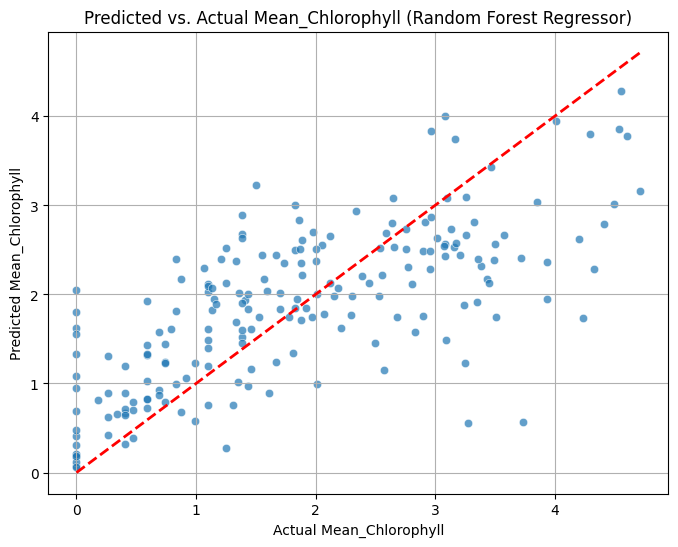

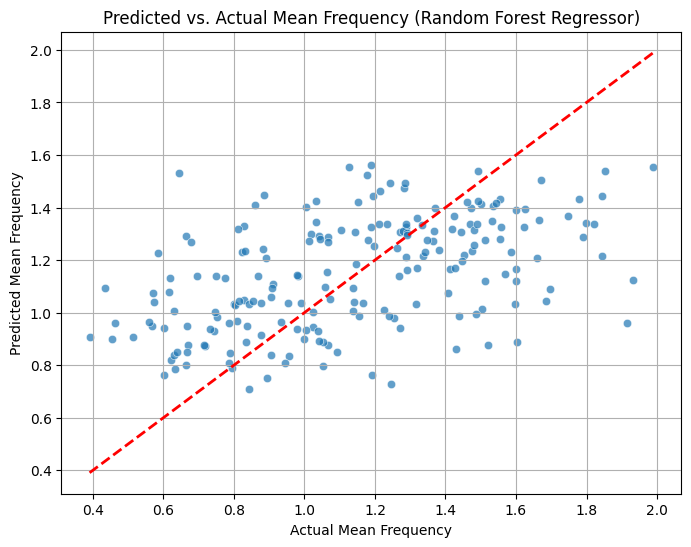

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the results for Random Forest Regressor for Mean_Chlorophyll
rf_chlorophyll_results = next(item for item in all_results if item['target'] == 'Mean_Chlorophyll' and item['model'] == 'Random Forest Regressor')

# Extract actual and predicted values
y_actual_chlorophyll = rf_chlorophyll_results['y_actual']
y_predicted_chlorophyll = rf_chlorophyll_results['y_predicted']

# Create scatter plot for Mean_Chlorophyll
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual_chlorophyll, y=y_predicted_chlorophyll, alpha=0.7)
plt.plot([min(y_actual_chlorophyll), max(y_actual_chlorophyll)], [min(y_actual_chlorophyll), max(y_actual_chlorophyll)], 'r--', lw=2) # Line for perfect prediction
plt.title('Predicted vs. Actual Mean_Chlorophyll (Random Forest Regressor)')
plt.xlabel('Actual Mean_Chlorophyll')
plt.ylabel('Predicted Mean_Chlorophyll')
plt.grid(True)
plt.show()

rf_mean_freq_results = next(item for item in all_results if item['target'] == 'mean_freq' and item['model'] == 'Random Forest Regressor')

y_actual_mean_freq = rf_mean_freq_results['y_actual']
y_predicted_mean_freq = rf_mean_freq_results['y_predicted']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual_mean_freq, y=y_predicted_mean_freq, alpha=0.7)
plt.plot([min(y_actual_mean_freq), max(y_actual_mean_freq)], [min(y_actual_mean_freq), max(y_actual_mean_freq)], 'r--', lw=2) # Line for perfect prediction
plt.title('Predicted vs. Actual Mean Frequency (Random Forest Regressor)')
plt.xlabel('Actual Mean Frequency')
plt.ylabel('Predicted Mean Frequency')
plt.grid(True)
plt.show()